In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"# paper,scissor
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"# paper,scissor
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"# paper,scissor
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [7]:
# 훈련데이터 만들기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


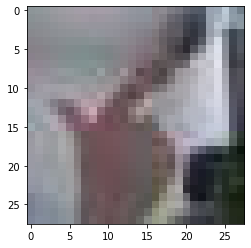

In [8]:
# 이미지 확인

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [9]:
# 학습데이터 reshpae
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


In [10]:
# 딥러닝 네트워크 설계하기

import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(18, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(50, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 18)        504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 18)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 50)        8150      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                40032     
_________________________________________________________________
dense_1 (Dense)              (No

In [11]:
# 학습데이터 학습하기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 5s 213ms/step - loss: 1.1041 - accuracy: 0.3985
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0703 - accuracy: 0.5793
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0460 - accuracy: 0.4511
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9964 - accuracy: 0.6747
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9209 - accuracy: 0.7687
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8111 - accuracy: 0.8187
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.8534
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.8930
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.9226
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.9099


In [12]:
#테스터데이터 만들기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


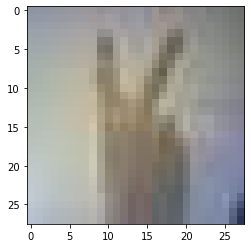

In [13]:
# 테스트 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_test[10])
print('라벨: ', y_test[10])

In [14]:
# 테스트 이미지 reshape 하기

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [15]:
# 테스트_accuracy 확인
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test_reshaped, y_test, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6376 - accuracy: 0.3258
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2047 - accuracy: 0.4256
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1086 - accuracy: 0.4188
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0081 - accuracy: 0.4772
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9315 - accuracy: 0.5236
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8603 - accuracy: 0.5729
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8756 - accuracy: 0.5736
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7675 - accuracy: 0.6095
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7515 - accuracy: 0.7115
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7371 - accuracy: 0.6774
